## <font color = blue>**1. What is KNN?**</font>

K-NN or K Nearest Neighbour Algorithm is a Machine Learning algorithm that works on Classification models.
Logistic regression was limited to solve the problems for Binary classification. However, K-NN is designed to solve the problem for Multi-class classification.

K-NN uses a simple concept called K - nearest neighbour, where K is the hyperparameter. As per this concept, on the
occurence of a new data point, K-NN algorithm tries to include the datapoint in the class having maximum number of
datapoints closest to the new datapoint.

Consider the following example to understand it more better:

In [1]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving KNN_graph.jpg to KNN_graph.jpg


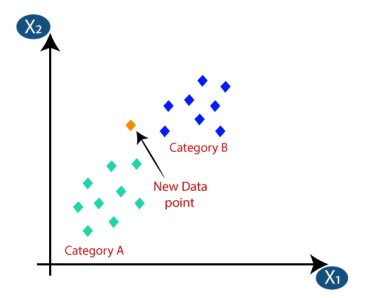

In [ ]:
Image('KNN_graph.jpg')

So, in the above example we have a  new datapoint occuring between Category Class A & category Class B.
It is our job to classify it in one of the categories.

Let us start first with locking in the value for hyperparameter 'k'. let us fix k=5.
So when I say k=5, then one has to only look for 5 nearest neighbours

Once fixed, the nearest neighbours are calculated by the concept of Euclidean distance. Euclidean distance is defined
as the shortest distance between 2 points.

Euclidean distance can be well understood from the following figure:

In [ ]:
uploaded = files.upload()

Saving KNN_Eucledian_dist.jpg to KNN_Eucledian_dist.jpg


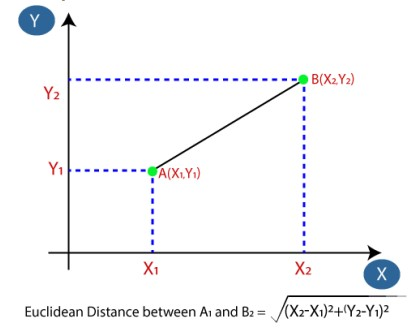

In [ ]:
Image('KNN_Eucledian_dist.jpg')

By using the concept of Euclidean distance we came to the following result.

In [ ]:
uploaded = files.upload()

Saving KNN_Eucledian_dist_2.jpg to KNN_Eucledian_dist_2.jpg


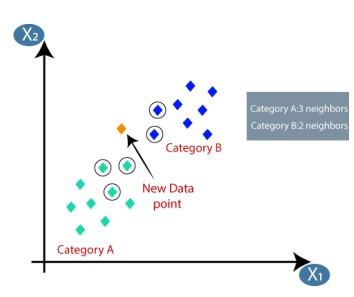

In [ ]:
Image('KNN_Eucledian_dist_2.jpg')

As evident from the above figure, for k=5 we have 3 nearest neighbours belonging to category A
and 2 nearest neighbours belonging to Category B. Since we have majority of close datapoints belonging to category A,
the new data point belongs to Category A.

K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

It is also called a lazy learner algorithm because it does not learn from the training set immediately
instead it stores the dataset and at the time of classification, it performs an action on the dataset.

One major drawback of K-NN is the fact that it does not perform well in case of dense data. Dense data
is the data where the datapoints are closely stacked.

K-NN however works well for Noisy data (data with too many Outliers) and small data.

# <font color = green>**Code for Underfitting**</font>

## <font color = red>**1. Importing the libraries**</font>

Let us import the essential libraries first.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <font color = red>**2. Reading the dataset**</font>

Let us read the dataset now. This dataset comprises of different types of Fish and their corresponding sizes. We need to use KNN to classify fishes species based on their attributes.

In [ ]:
data=pd.read_csv("Fish_dataset.csv")

In [ ]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


As evident above, we have different Fish species (e.g Bream, Smelt) and their corresponding size attributes.
Since the dataset is big and we cannot see all the Species above, let us try to check all the categories of
species with the help of unique function.

In [ ]:
data['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

Here unique function will remove the duplicates and return the distinct category names of Species.
From the array above we get to see 7 different categories.

## <font color = red>**3. Null value check**</font>

Now let us check if we got any null values in the dataset.

In [ ]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

No null value as such, let us check for any special characters.

## <font color = red>**4. Special characters check**</font>

We check the special characters in the data for every column using unique function().

In [ ]:
for i in data.columns:
    print(f"Unique values for coulmn: {i}\n\n{data[i].unique()}\n")

Unique values for coulmn: Species

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']

Unique values for coulmn: Weight

[ 242.   290.   340.   363.   430.   450.   500.   390.   475.   600.
  700.   610.   650.   575.   685.   620.   680.   725.   720.   714.
  850.  1000.   920.   955.   925.   975.   950.    40.    69.    78.
   87.   120.     0.   110.   150.   145.   160.   140.   169.   161.
  200.   180.   272.   270.   306.   540.   800.    55.    60.    90.
  170.   273.   300.     5.9   32.    51.5   70.   100.    80.    85.
  115.   125.   130.   135.   225.   188.   197.   218.   260.   265.
  250.   320.   514.   556.   840.   690.   900.   820.  1015.  1100.
  345.   456.   510.   567.   770.  1250.  1600.  1550.  1650.     6.7
    7.5    7.     9.7    9.8    8.7   10.     9.9   12.2   13.4   19.7
   19.9]

Unique values for coulmn: Length1

[23.2 24.  23.9 26.3 26.5 26.8 27.6 28.5 28.4 28.7 29.1 29.5 29.4 30.4
 30.9 31.  31.3 31.4 31.5 31.8 31.9 32.  32.7 32.8

As evident from the output above we do not have any special characters (similar to ?) in the above dataset.
So let us move on to spliting the dependent and independent variables here.

Remember our target column is Species which is 'y' whereas the columns 'weight', 'length1', 'length2', 'length3', 'height' and
'width' are independent ones i.e. 'x'.
So let us split the data accordingly.

## <font color = red>**5. Splitting the data**</font>

Let us first look how our data looks like.

In [ ]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


While splitting we are either doing slicing or providing an index.
In the data above, the independent columns start from index '1' to the last index '6'.

So while splitting the data for independent columns (X) we have to provide a colon ':' first which indicates 'for all rows of X' and then we have to provide a range (slicing) starting from index 1 to the end of the data.

To mention the last column one can either use '1:6' or '1:' both means till the end of the data.
While splitting the data  for dependent column 'Y' we  provide the index position of the Column Species which is '0'.

The splitting done would be then viewed as follows:

In [ ]:
X= data.values[:,1:]
Y= data.values[:,0]

In [ ]:
X

array([[242.0, 23.2, 25.4, 30.0, 11.52, 4.02],
       [290.0, 24.0, 26.3, 31.2, 12.48, 4.3056],
       [340.0, 23.9, 26.5, 31.1, 12.3778, 4.6961],
       [363.0, 26.3, 29.0, 33.5, 12.73, 4.4555],
       [430.0, 26.5, 29.0, 34.0, 12.444, 5.134],
       [450.0, 26.8, 29.7, 34.7, 13.6024, 4.9274],
       [500.0, 26.8, 29.7, 34.5, 14.1795, 5.2785],
       [390.0, 27.6, 30.0, 35.0, 12.67, 4.69],
       [450.0, 27.6, 30.0, 35.1, 14.0049, 4.8438],
       [500.0, 28.5, 30.7, 36.2, 14.2266, 4.9594],
       [475.0, 28.4, 31.0, 36.2, 14.2628, 5.1042],
       [500.0, 28.7, 31.0, 36.2, 14.3714, 4.8146],
       [500.0, 29.1, 31.5, 36.4, 13.7592, 4.368],
       [340.0, 29.5, 32.0, 37.3, 13.9129, 5.0728],
       [600.0, 29.4, 32.0, 37.2, 14.9544, 5.1708],
       [600.0, 29.4, 32.0, 37.2, 15.438, 5.58],
       [700.0, 30.4, 33.0, 38.3, 14.8604, 5.2854],
       [700.0, 30.4, 33.0, 38.5, 14.938, 5.1975],
       [610.0, 30.9, 33.5, 38.6, 15.633, 5.1338],
       [650.0, 31.0, 33.5, 38.7, 14.4738, 5.7276],


In [ ]:
Y

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

## <font color = red>**6. Scaling the data**</font>

Once the data is split into X and Y, we have to  scale the data first.
It is important to scale the data into the range of -3 to 3 to avoid unnecessary bias of the algorithm.
To scale the data, we use StandardScaler function from preprocessing library.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X

array([[-4.38072172e-01, -3.05788578e-01, -2.82303007e-01,
        -1.06020232e-01,  5.96578670e-01, -2.36528948e-01],
       [-3.03562184e-01, -2.25507242e-01, -1.98053663e-01,
        -2.33668373e-03,  8.21260549e-01, -6.65789457e-02],
       [-1.63447613e-01, -2.35542409e-01, -1.79331587e-01,
        -1.09769794e-02,  7.97341291e-01,  1.65793169e-01],
       [-9.89949100e-02,  5.30159764e-03,  5.46943678e-02,
         1.96390116e-01,  8.79771455e-01,  2.26210031e-02],
       [ 8.87586153e-02,  2.53719316e-02,  5.46943678e-02,
         2.39591594e-01,  8.12834979e-01,  4.26371272e-01],
       [ 1.44804444e-01,  5.54774324e-02,  1.20221635e-01,
         3.00073664e-01,  1.08395111e+00,  3.03431249e-01],
       [ 2.84919015e-01,  5.54774324e-02,  1.20221635e-01,
         2.82793073e-01,  1.21901769e+00,  5.12357880e-01],
       [-2.33330416e-02,  1.35758768e-01,  1.48304750e-01,
         3.25994551e-01,  8.65728838e-01,  1.62163285e-01],
       [ 1.44804444e-01,  1.35758768e-01,  1.483

## <font color = red>**7.  Performing train_test split**</font>

Once done with scaling we have to split it further into train and test data.
Here test data is 20 % of the total data, whereas train data is the remaining 80%.
Splitting the data into train & test data is done by importing 'train_test_split' function from
sklearn library and model selection sub-library as follows:

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [ ]:
X_train.shape

(127, 6)

In [ ]:
Y_train.shape

(127,)

## <font color = red>**8. Applying KNeighbors Classifier**</font>

It is time to apply K-NN logic to find out the nearest neighbours. This we execute using KNeighborsClassifier function from neighbors sublibrary of the sklearn library.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')

here "n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean'" can be simply replaced by
"n_neighbors=5,metric='euclidean'" or any number for n_neighbors so to say.

n_neighbors is simply the hyperparameter 'k', which can be manually adjusted.
The metric of finding the shortest distance here is Eucledian.

Now let us train the data using fit function.

In [ ]:
model_KNN.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

## <font color = red>**9. Predicting Y_pred based on X_test**</font>

Now let us predict Y_pred based on our test data. We further print a zip list to compare Y_test and Y_pred. This will let us know the degree of
misclassification done by our model.

In [ ]:
Y_pred = model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[('Perch', 'Perch'), ('Bream', 'Bream'), ('Roach', 'Perch'), ('Roach', 'Perch'), ('Perch', 'Perch'), ('Smelt', 'Smelt'), ('Whitefish', 'Perch'), ('Perch', 'Perch'), ('Smelt', 'Smelt'), ('Bream', 'Bream'), ('Perch', 'Perch'), ('Perch', 'Perch'), ('Bream', 'Bream'), ('Perch', 'Perch'), ('Roach', 'Perch'), ('Bream', 'Bream'), ('Bream', 'Bream'), ('Perch', 'Perch'), ('Smelt', 'Smelt'), ('Perch', 'Smelt'), ('Roach', 'Perch'), ('Parkki', 'Parkki'), ('Perch', 'Perch'), ('Roach', 'Perch'), ('Smelt', 'Smelt'), ('Perch', 'Perch'), ('Bream', 'Bream'), ('Pike', 'Pike'), ('Perch', 'Perch'), ('Bream', 'Bream'), ('Bream', 'Bream'), ('Perch', 'Perch')]


After looking at the dictionary above we get to know not all the categories of Species are correctly classified.
To give an example
('Bream', 'Bream') = Correctly classified.
('Whitefish', 'Perch') = Incorrect classification.

Let us get the overall statistics about misclassification and accuracy of the model using confusion matrix

## <font color = red>**10. Evaluation using Confusion Matrix**</font>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[ 8  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0 11  0  0  1  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  1  0  0  0  0]]
Classification report:
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         8
      Parkki       1.00      1.00      1.00         1
       Perch       0.65      0.92      0.76        12
        Pike       1.00      1.00      1.00         1
       Roach       0.00      0.00      0.00         5
       Smelt       0.80      1.00      0.89         4
   Whitefish       0.00      0.00      0.00         1

    accuracy                           0.78        32
   macro avg       0.64      0.70      0.66        32
weighted avg       0.66      0.78      0.71        32

Accuracy of the model: 0.78125


C:\Users\ninad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ninad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ninad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here, if you look at the accuracy obtained. It is around 0.78 (i.e. 78 %), which is quite low. This is called as
Underfitting.

Underfitting occurs when say if we have too many categories and the relevant data for the categories is not increased
with the increase in categories.
To define Underfitting one can simply say, model has not learned patterns on training data well maybe due to
insufficient features and low variance.
In simpler terms, Underfitting indicates either the data is "too simple" or "lack of data". This reduces model performance
both on training and testing data. Hence, the predictions are not relaible.

On the contrary, Overfitting is another concept where the machine learns a lot on training data, but performs poorly on
testing data and hence cannot predict the future data well. This is so because, while doing training it learns on details
(high variance) and noise so much so that it affects the performance on test data.


So, quote on quote one can say:

"Underfitting happens due to high bias and low variance."

"Overfitting happens due to low bias and high variance."


Underfitting can be resolved by increasing the model complexity or by increasing the data.

Overfitting can be resolved by increasing the variance in the data. Say, in the above case try increasing the categories
to avoid Overfitting.

However, when you increase the number of categories, make sure also to increase the complexity of data to avoid
Underfitting.

# <font color = green>**Code for Overfitting**</font>

To extract fewer categories (only Bream & Smelt) from the Fish_dataset I queried via SQL and updated the dataset.

In [2]:
uploaded = files.upload()

Saving KNN_db_SQL_upd_1.jpg to KNN_db_SQL_upd_1.jpg


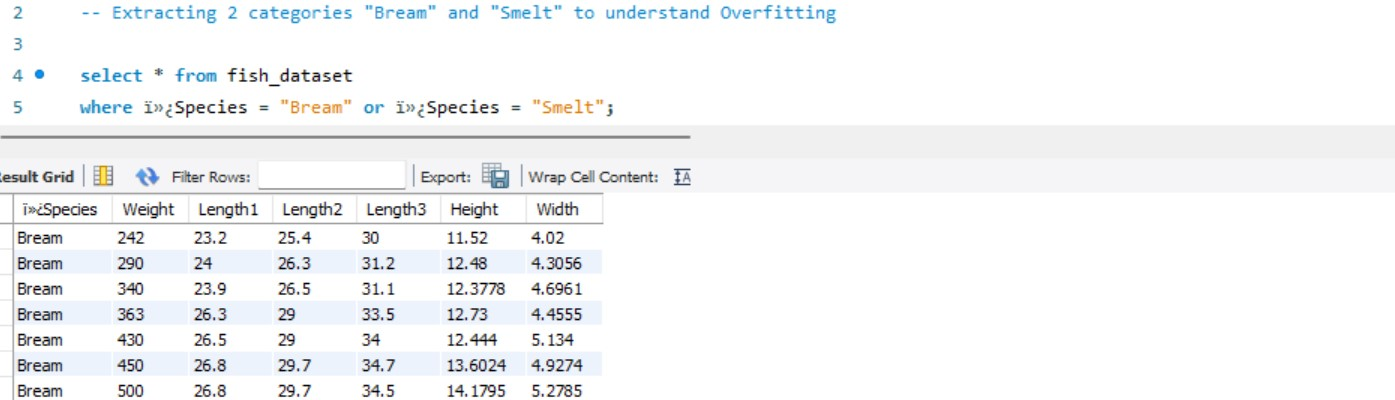

In [3]:
Image('KNN_db_SQL_upd_1.jpg')

## <font color = red>**1. Reading the dataset**</font>

In [ ]:
data_new=pd.read_csv("fish_dataset_updated.csv")

In [ ]:
data_new

,ï»¿Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500,28.5,30.7,36.2,14.2266,4.9594


In [ ]:
data_new['ï»¿Species'].unique()

array(['Bream', 'Smelt'], dtype=object)

## <font color = red>**2. Null value check**</font>

In [ ]:
data_new.isnull().sum()

ï»¿Species    0
Weight        0
Length1       0
Length2       0
Length3       0
Height        0
Width         0
dtype: int64

## <font color = red>**3. Unique value check**</font>

In [ ]:
for i in data_new.columns:
    print(f"Unique values for coulmn: {i}\n\n{data_new[i].unique()}\n")

Unique values for coulmn: ï»¿Species

['Bream' 'Smelt']

Unique values for coulmn: Weight

[ 242  290  340  363  430  450  500  390  475  600  700  610  650  575
  685  620  680  725  720  714  850 1000  920  955  925  975  950    7
    8   10    9   12   13   20]

Unique values for coulmn: Length1

[23.2 24.  23.9 26.3 26.5 26.8 27.6 28.5 28.4 28.7 29.1 29.5 29.4 30.4
 30.9 31.  31.3 31.4 31.5 31.8 31.9 32.  32.7 32.8 33.5 35.  36.2 37.4
 38.   9.3 10.  10.1 10.4 10.7 10.8 11.3 11.4 11.5 11.7 12.1 13.2 13.8]

Unique values for coulmn: Length2

[25.4 26.3 26.5 29.  29.7 30.  30.7 31.  31.5 32.  33.  33.5 34.  34.5
 35.  36.  37.  38.5 39.5 41.   9.8 10.5 10.6 11.  11.2 11.3 11.8 12.
 12.2 12.4 13.  14.3 15. ]

Unique values for coulmn: Length3

[30.  31.2 31.1 33.5 34.  34.7 34.5 35.  35.1 36.2 36.4 37.3 37.2 38.3
 38.5 38.6 38.7 39.5 39.2 39.7 40.6 40.5 40.9 41.5 41.6 42.6 44.1 44.
 45.3 45.9 46.5 10.8 11.6 12.  12.4 12.6 13.1 13.2 13.4 13.5 13.8 15.2
 16.2]

Unique values for coulmn:

In [ ]:
data_new

,ï»¿Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500,28.5,30.7,36.2,14.2266,4.9594


## <font color = red>**4. Splitting the values**</font>

In [ ]:
X= data_new.values[:,1:]
Y= data_new.values[:,0]

In [ ]:
X

array([[242, 23.2, 25.4, 30.0, 11.52, 4.02],
       [290, 24.0, 26.3, 31.2, 12.48, 4.3056],
       [340, 23.9, 26.5, 31.1, 12.3778, 4.6961],
       [363, 26.3, 29.0, 33.5, 12.73, 4.4555],
       [430, 26.5, 29.0, 34.0, 12.444, 5.134],
       [450, 26.8, 29.7, 34.7, 13.6024, 4.9274],
       [500, 26.8, 29.7, 34.5, 14.1795, 5.2785],
       [390, 27.6, 30.0, 35.0, 12.67, 4.69],
       [450, 27.6, 30.0, 35.1, 14.0049, 4.8438],
       [500, 28.5, 30.7, 36.2, 14.2266, 4.9594],
       [475, 28.4, 31.0, 36.2, 14.2628, 5.1042],
       [500, 28.7, 31.0, 36.2, 14.3714, 4.8146],
       [500, 29.1, 31.5, 36.4, 13.7592, 4.368],
       [340, 29.5, 32.0, 37.3, 13.9129, 5.0728],
       [600, 29.4, 32.0, 37.2, 14.9544, 5.1708],
       [600, 29.4, 32.0, 37.2, 15.438, 5.58],
       [700, 30.4, 33.0, 38.3, 14.8604, 5.2854],
       [700, 30.4, 33.0, 38.5, 14.938, 5.1975],
       [610, 30.9, 33.5, 38.6, 15.633, 5.1338],
       [650, 31.0, 33.5, 38.7, 14.4738, 5.7276],
       [575, 31.3, 34.0, 39.5, 15.1285, 

In [ ]:
Y

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

## <font color = red>**5. Scaling the data**</font>

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [ ]:
X_train.shape

(39, 6)

In [ ]:
Y_train.shape

(39,)

## <font color = red>**6. Applying KNeighbors classifier**</font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')

In [ ]:
model_KNN.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

## <font color = red>**7. Predicting Y_pred on X_test**</font>

In [ ]:
Y_pred = model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[('Smelt', 'Smelt'), ('Bream', 'Bream'), ('Bream', 'Bream'), ('Bream', 'Bream'), ('Bream', 'Bream'), ('Bream', 'Bream'), ('Bream', 'Bream'), ('Bream', 'Bream'), ('Bream', 'Bream'), ('Bream', 'Bream')]


## <font color = red>**8. Evaluation using confusion matrix**</font>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")
print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[9 0]
 [0 1]]
Classification report:
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         9
       Smelt       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Accuracy of the model: 1.0


So as one can clearly see here, on reducing the number of categories the accuracy has increased to 100 %.
Even the confusion matrix shows 0 misclassified values.
This is what we call as "Overfitting". Although it does look like it has been trained well for high variance,
this data will perform poor on test data.